In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sts
import math
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [3]:
mu = 0
sigma = 1
N = 10000

In [4]:
def graph(n):
    print '\n', 'n = ', n
    norm_rv = sts.norm(mu, sigma) 
    distr = norm_rv.rvs(n)
    ecdf = ECDF(distr)
    x = np.linspace(-5, 5, 10000)
    cdf = norm_rv.cdf(x)
    plt.plot(x, ecdf(x), 'r.:') #строим график эмпирической функции распределения
    plt.scatter(distr, np.zeros(n), alpha=0.2) #отмечаем на оси абцисс точки, в которых происходит скачок
    plt.plot(x, cdf, 'g') #строим график теоретической функции распределения
    plt.show()

Построим графики для различных значений n.


n =  10


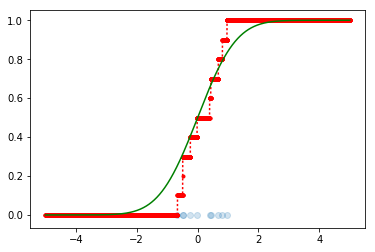


n =  25


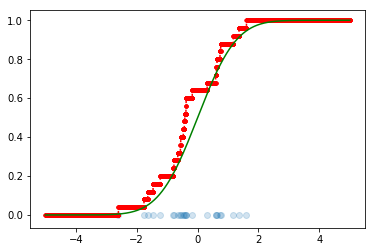


n =  50


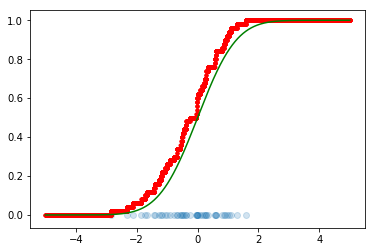


n =  100


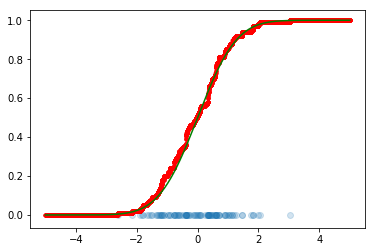


n =  1000


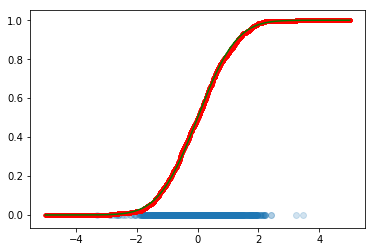


n =  10000


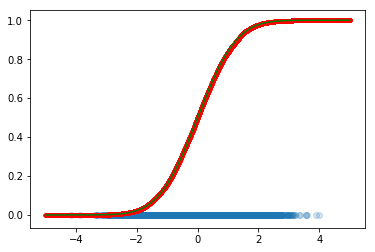

In [5]:
print(u'Построим графики для различных значений n.\n')
graph(10)
graph(25)
graph(50)
graph(100)
graph(1000)
graph(N)

In [6]:
x = np.linspace(-5, 5, 10000)
norm_rv = sts.norm(mu, sigma)
cdf = norm_rv.cdf(x)
Dn = np.zeros((N)) 
distr = norm_rv.rvs(N)
for n in range(1, N + 1):
    ecdf = ECDF(distr[:n]) #для каждого n находим эмпирическую функцию распределения
    cnt = 0
    for t in x:
        Dn[n - 1] = max(Dn[n - 1], abs(ecdf(t) - cdf[cnt])) #получаем массив Dn
        cnt += 1

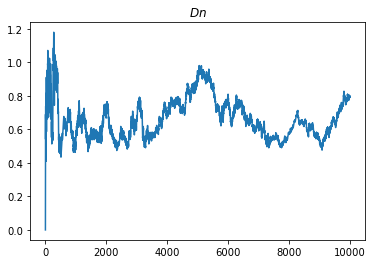

In [262]:
plt.plot(range(1, N + 1), Dn) #строим график Dn
plt.title('$Dn$')
plt.show()

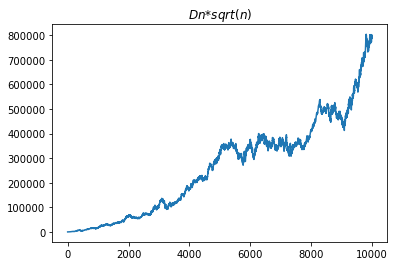

In [266]:
for n in range(1, N + 1):
    Dn[n - 1] *= (n - 1)**(1./2)
plt.plot(range(1, N + 1), Dn) #строим график Dn*sqrt(n)
plt.title('$Dn$*$sqrt(n)$')